### What is Outliers?

    ### 1) Outliers is completely differentl data point or records.
    ### 2) Significantly different from other record from data.
    

## Which Machine Learning Algorith is Sesitive to Outliers?
1) Naivy Bayes -----Not Sensitive To Outliers.
2) SVM  ----------  Not Sensitive TO Outliers.
3) Linear Regression--  Sensitive TO Outliers.
4) Logistic Regresion-- Sensitive TO Outliers.
5) Decision Tree Regresso or Classifier-----  Not Sensitive TO Outliers.
6) Ensemble(XG/GB/RF/AB)--  Not Sensitive To Outliers.
7) KNN---------  Not Sensitive To Outliers.
8) KMeans------  Sensitive To Outliers.
9) Hierarchical- Sensitive To Outliers.
10) PCA--------- Sensitive To Outliers.
11) Neural Network--  Sensitive TO Outliers.

In [5]:
### importing important libraies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
titanic=pd.read_csv("E://Datasets//Miscellaneous//Titanic//train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
## Finding the shape of Dataset.
titanic.shape

(891, 12)

In [9]:
### Checking Null values.
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic['Age'].isnull().sum()

177

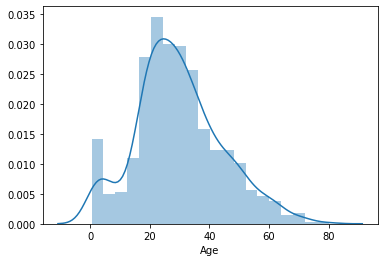

In [16]:
import seaborn as sns
sns.distplot(titanic['Age'].dropna())

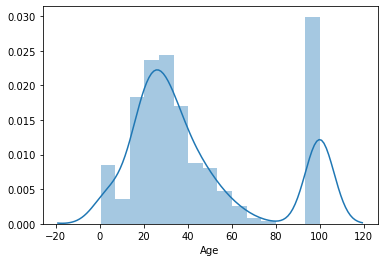

In [17]:
sns.distplot(titanic['Age'].fillna(100))

### Gaussion Distibtuion.

Text(0, 0.5, 'No of Passenger')

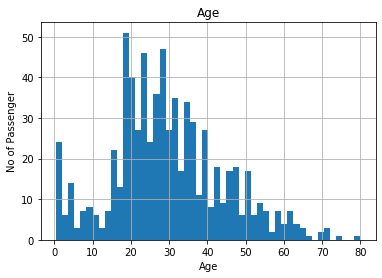

In [24]:
### checking outlies without filling null values.
figure=titanic.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')


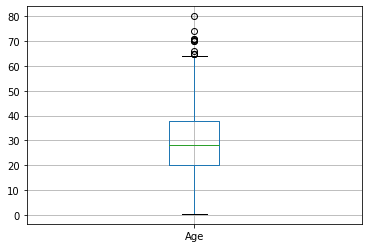

In [25]:
#### Finding the outiers.
figure=titanic.boxplot(column='Age')

In [27]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
#### Assuming AGE follows a Guassion Distribution.We will calculate the boundries which differentiates the outlires.
titanic['Age'].mean()

29.69911764705882

### If the data is Guassion /Nomall Disibuted we used this.

In [43]:
### Calculating UppeBondy and LoweBoundry for Gaussiona Distribution.
upperboundry=titanic['Age'].mean()+3*titanic['Age'].std()
lowerboundry=titanic['Age'].mean()-3*titanic['Age'].std()
print("UpperBoundry :",upperboundry)
print("lowerboundry :",lowerboundry)

UpperBoundry : 73.27860964406095
lowerboundry : -13.88037434994331


### Feature is Skewed we used below technique

Text(0, 0.5, 'No of Passenger')

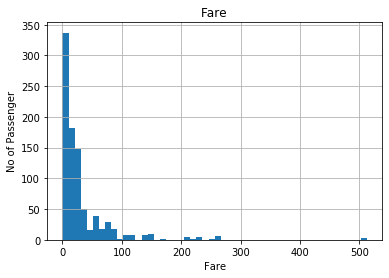

In [44]:
### checking outlies without filling null values.
figure=titanic.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')


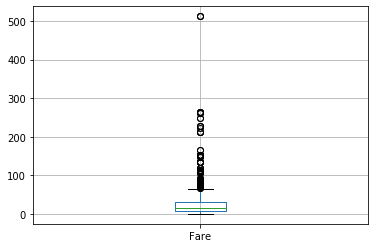

In [45]:
#### Finding the outiers.
figure=titanic.boxplot(column='Fare')

In [46]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [47]:
### Compute Inter-quantile ange to calculate the boundry.
IQR=titanic.Fare.quantile(0.75)-titanic.Fare.quantile(0.25)
print(IQR)

23.0896


In [48]:
### Finding lower and Upper boundry.
lower_bridge=titanic['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=titanic['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [49]:
lower_bridge=titanic['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=titanic['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


### Handling the outliers.


In [51]:
data=titanic.copy()

In [52]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
data.loc[data['Age']>73,'Age']=73
data.loc[data['Fare']>100,'Fare']=100    

Text(0, 0.5, 'No of Passenger')

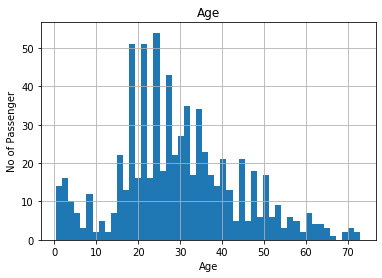

In [55]:
# Display Age by hist.
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')


Text(0, 0.5, 'No of Passenger')

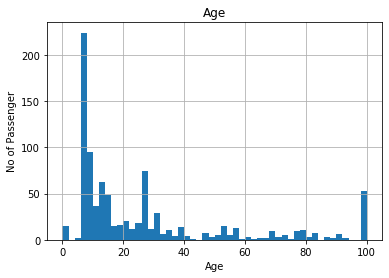

In [56]:
## Displa fare by Hist.
figure=data.Fare.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

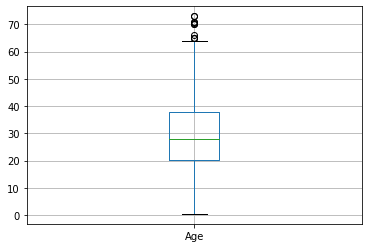

In [57]:
#### Finding the outiers.
figure=data.boxplot(column='Age')

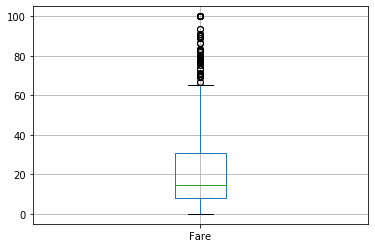

In [58]:
#### Finding the outiers.
figure=data.boxplot(column='Fare')

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3,random_state=10)

In [75]:
### Applying logistic Regression.
from sklearn.linear_model import LogisticRegression
log_class=LogisticRegression()
log_class.fit(x_train,y_train)
y_pread=log_class.predict(x_test)
y_pread_1=log_class.predict_log_proba(x_test)

In [76]:
### impoting scoing libraies.
from sklearn.metrics import accuracy_score,roc_auc_score
score=accuracy_score(y_pread,y_test)
#auc_score=roc_auc_score(y_pread_1[:,1],y_test)
print(score)
#print(auc_score)


0.75


In [77]:
### Applying Random Forest Algorithm.
from sklearn.ensemble import RandomForestClassifier
ran_class=RandomForestClassifier()
ran_class.fit(x_train,y_train)
y_pread=ran_class.predict(x_test)
Score=accuracy_score(y_test,y_pread)
print(Score)

0.664179104477612
